In [1]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

from scipy import stats
import tensorboard as tb
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

2024-09-12 20:33:26.481944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
def extract_tb_values(logdir, value_name, print_tags = False):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()
    
    if print_tags:
        print(event_acc.Tags()['scalars'])
        
    if value_name not in event_acc.Tags()['scalars']:
        print("Scalar not found.")
        return [], [], []
    else:
        events = event_acc.Scalars(value_name)
    
    steps = [event.step for event in events]
    values = [event.value for event in events]
    wall_time = [event.wall_time for event in events]
    
    return values, steps, wall_time

In [8]:
def get_names_meeting_env(logdir_list):
    name_list = []
    for file_name in logdir_list:
        name = re.sub("training/meeting_training/((s)?\d/)?", "", re.sub("(_\d)?/tensorboard_logs/.*", "",  file_name))
        name_list.append(name)
        
    return name_list

In [39]:
def get_df_in_steps(logdir_list, plot_names, value_name):
    df = pd.DataFrame()
    
    for (file_name, plot_name) in zip(logdir_list, plot_names):
        values, steps, _ = extract_tb_values(file_name, value_name)
        
        value_dict = {value_name: values, 
                      "steps": steps, 
                      "run": np.repeat(plot_name, len(values))}
        
        df = df._append(pd.DataFrame(value_dict))
        
        print(plot_name + " done!")
     
    # display(df)    
    return df        

In [36]:
# recursively read tensorboard files
tb_files = []
for filename in glob('training/meeting_training/7/**/events*', recursive=True):
    tb_files.append(filename)
tb_files = [filename for filename in tb_files if not "dyn" in filename]
display(tb_files)

df_dqn7 = get_df_in_steps(tb_files, get_names_meeting_env(tb_files), "rollout/eval_reward_sum")

['training/meeting_training/7/dqn_7_llr_25_2/tensorboard_logs/events.out.tfevents.1725652352.v100gpu25.1198879.0',
 'training/meeting_training/7/dqn_7_llr_25/tensorboard_logs/events.out.tfevents.1725364863.v100gpu21.1540416.0',
 'training/meeting_training/7/dqn_7_1/tensorboard_logs/events.out.tfevents.1720035804.v100gpu5.759428.0',
 'training/meeting_training/7/dqn_7_llr_75/tensorboard_logs/events.out.tfevents.1725364871.v100gpu16.1035861.0',
 'training/meeting_training/7/dqn_7_lllr_010/tensorboard_logs/events.out.tfevents.1725898116.v100gpu14.684492.0',
 'training/meeting_training/7/dqn_7_llr_10_2/tensorboard_logs/events.out.tfevents.1725632873.v100gpu27.1256034.0',
 'training/meeting_training/7/dqn_7_llr_10/tensorboard_logs/events.out.tfevents.1725364857.v100gpu25.1074488.0',
 'training/meeting_training/7/dqn_7_llr_50_2/tensorboard_logs/events.out.tfevents.1725665920.v100gpu29.1295939.0',
 'training/meeting_training/7/dqn_7_llr_50/tensorboard_logs/events.out.tfevents.1725364870.v100g

dqn_7_llr_25 succes!
dqn_7_llr_25 succes!
dqn_7 succes!
dqn_7_llr_75 succes!
dqn_7_lllr_010 succes!
dqn_7_llr_10 succes!
dqn_7_llr_10 succes!
dqn_7_llr_50 succes!
dqn_7_llr_50 succes!
dqn_7_llr_75 succes!
dqn_7 succes!


<Axes: xlabel='steps', ylabel='rollout/eval_reward_sum'>

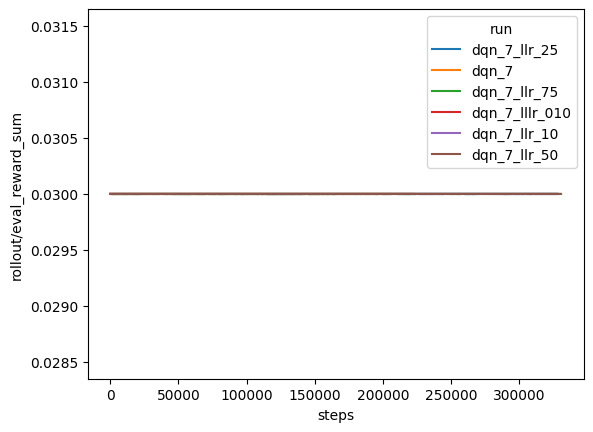

In [37]:
sns.lineplot(data = df_dqn7, x = "steps", y = "rollout/eval_reward_sum", hue = "run")

In [48]:
# recursively read tensorboard files
tb_files = []
for filename in glob('training/meeting_training/s7/**/events*', recursive=True):
    tb_files.append(filename)
display(tb_files)

df_seqdqn7 = get_df_in_steps(tb_files, get_names_meeting_env(tb_files), "rollout/eval_reward_sum")

['training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/events.out.tfevents.1725364896.v100gpu15.718987.0',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent2/events.out.tfevents.1725364899.v100gpu15.718987.17',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent6/events.out.tfevents.1725364899.v100gpu15.718987.21',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent3/events.out.tfevents.1725364899.v100gpu15.718987.18',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_target_value_agent2/events.out.tfevents.1725364899.v100gpu15.718987.24',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent0/events.out.tfevents.1725364899.v100gpu15.718987.15',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_average_loss_agent5/events.out.tfevents.1725364899.v100gpu15.718987.13',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/

s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not

<Axes: xlabel='steps', ylabel='rollout/eval_reward_sum'>

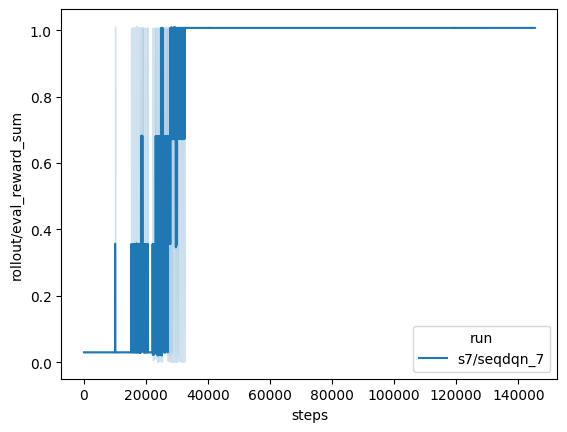

In [49]:
sns.lineplot(df_seqdqn7, x = "steps", y = "rollout/eval_reward_sum", hue = "run")

In [51]:
# recursively read tensorboard files
tb_files = []
for filename in glob('training/meeting_training/s7/**/events*', recursive=True):
    tb_files.append(filename)
display(tb_files)

df_seqdqn7_ep_len = get_df_in_steps(tb_files, get_names_meeting_env(tb_files), "rollout/ep_len")

['training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/events.out.tfevents.1725364896.v100gpu15.718987.0',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent2/events.out.tfevents.1725364899.v100gpu15.718987.17',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent6/events.out.tfevents.1725364899.v100gpu15.718987.21',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent3/events.out.tfevents.1725364899.v100gpu15.718987.18',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_target_value_agent2/events.out.tfevents.1725364899.v100gpu15.718987.24',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_avg_Q_value_agent0/events.out.tfevents.1725364899.v100gpu15.718987.15',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/train_average_loss_agent5/events.out.tfevents.1725364899.v100gpu15.718987.13',
 'training/meeting_training/s7/seqdqn_7_2/tensorboard_logs/

s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not found.
s7/seqdqn_7 done!
Scalar not

In [53]:
sns.lineplot(df_seqdqn7_ep_len, x = "steps", y = "rollout/ep_len", hue = "run")